In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import metrics

In [2]:
df = pd.read_csv('/content/Diamond Price Prediction.csv')
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='Cut(Quality)', ylabel='Price(in US dollars)'>

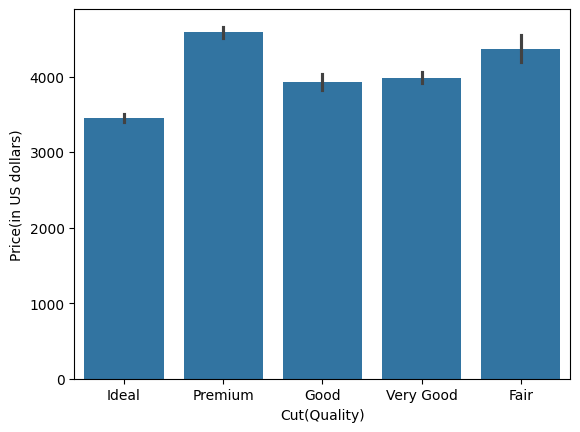

In [3]:
sns.barplot(data=df,x='Cut(Quality)',y='Price(in US dollars)')

<Axes: xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

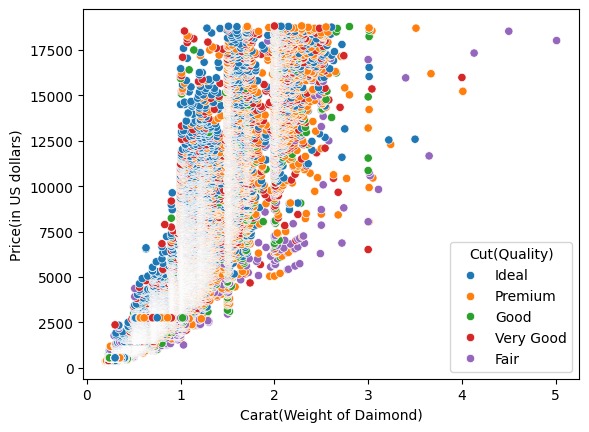

In [4]:
sns.scatterplot(data=df,x='Carat(Weight of Daimond)',y='Price(in US dollars)',hue='Cut(Quality)')

In [5]:
df['Cut(Quality)'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [6]:
df['Color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [7]:
df['Clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [8]:
le = LabelEncoder()
df['Cut(Quality)'] = le.fit_transform(df['Color'])
df['Color'] = le.fit_transform(df['Color'])
df['Clarity'] = le.fit_transform(df['Clarity'])

In [9]:
x = df.drop(['Price(in US dollars)'],axis=1)
y = df['Price(in US dollars)']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [12]:
y_pred = dt.predict(x_test)
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE score is {}'.format(rmse))

MAE is 354.2186688913608
MSE is 509196.44530960324
RMSE score is 713.5800202567357


In [13]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [15]:
y_pred = rf.predict(x_test)
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE score is {}'.format(rmse))

MAE is 270.88653874123804
MSE is 295539.3117791708
RMSE score is 543.6352745905758
